In [42]:
# Webscraped wikipedia page to get Open Championship Winners, then presented % by country in pie chart

In [1]:
#Instal necessary packages
!pip install lxml
!pip install BeautifulSoup4
from bs4 import BeautifulSoup #sometimes issues installing BeautifulSoup so included two ways 
import numpy as np
import pandas as pd 
import requests 
from urllib.request import urlopen
import ssl
import csv

In [68]:
#get data from Wikipedia page
source = requests.get('https://en.wikipedia.org/wiki/List_of_The_Open_Championship_champions').text #change to your wikipedia link containing list

soup = BeautifulSoup(source, 'lxml')

print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of The Open Championship champions - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"89539cfb-8fa7-4750-b75b-047ea5b9f2ea","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_The_Open_Championship_champions","wgTitle":"List of The Open Championship champions","wgCurRevisionId":1055436650,"wgRevisionId":1055436650,"wgArticleId":18541861,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles with dead external links","Articles with de

In [95]:
#start process to extract only the table data
wiki_table = soup.find('table',{'class':'sortable plainrowheaders wikitable'}) #find what the class is in html code 
wiki_table_rows = wiki_table.find_all('tr')

In [97]:
#loop through and add elements to data array
data = []
for row in wiki_table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])

df = pd.DataFrame(data, columns=['Country', 'Champion','Course', 'Location', 'Total Score','Par']) # Change names for output columns
df = df[~df['Country'].isnull()]  

In [101]:
#drop unassigned failsafe
df.drop(df[df['Country']=="Not assigned"].index,axis=0, inplace=True)

In [103]:
#sort data
df = df.reset_index(drop=True)

In [104]:
#view table data
df.head(10)

,Country,Champion,Course,Location,Total Score,Par
0,Scotland,Willie Park Sr.,Prestwick Golf Club,"Prestwick, Scotland",174,n/a
1,Scotland,Tom Morris Sr.,Prestwick Golf Club,"Prestwick, Scotland",163,n/a
2,Scotland,Tom Morris Sr.,Prestwick Golf Club,"Prestwick, Scotland",163,n/a
3,Scotland,Willie Park Sr.,Prestwick Golf Club,"Prestwick, Scotland",168,n/a
4,Scotland,Tom Morris Sr.,Prestwick Golf Club,"Prestwick, Scotland",167,n/a
5,Scotland,Andrew Strath,Prestwick Golf Club,"Prestwick, Scotland",162,n/a
6,Scotland,Willie Park Sr.,Prestwick Golf Club,"Prestwick, Scotland",169,n/a
7,Scotland,Tom Morris Sr.,Prestwick Golf Club,"Prestwick, Scotland",170,n/a
8,Scotland,Tom Morris Jr.,Prestwick Golf Club,"Prestwick, Scotland",154,n/a
9,Scotland,Tom Morris Jr.,Prestwick Golf Club,"Prestwick, Scotland",157,n/a


In [40]:
#convert df to csv
final_df.to_csv('ISO_codes.csv', index=False)

In [58]:
# download csv
final_df.to_csv(r"C:\Users\xxxx\xxxx\Documents\ML_projects\ISO_codes2.csv") # replace with your filepath

In [126]:
df_count = df.Country.value_counts()
print(df_count)

United States       45
Scotland            41
England             22
—                   13
South Africa        10
Australia            9
Jersey               7
Northern Ireland     3
Spain                3
Ireland              3
France               1
New Zealand          1
Argentina            1
Zimbabwe             1
Sweden               1
Italy                1
Name: Country, dtype: int64


In [128]:
df_count.head(5)

United States    45
Scotland         41
England          22
—                13
South Africa     10
Name: Country, dtype: int64

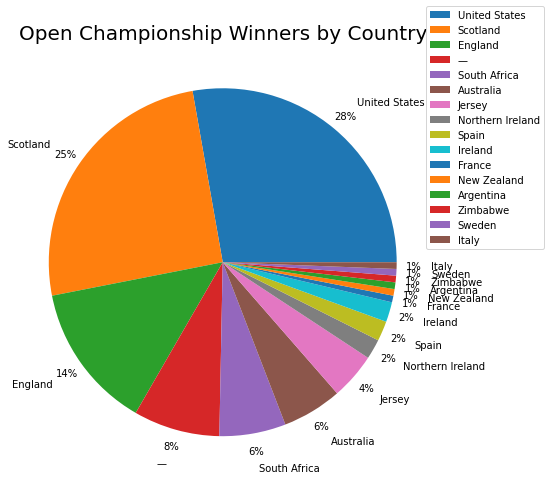

In [204]:
import matplotlib.pyplot as plt
import numpy as np

plt.pie(df_count, labels = df_count.index, autopct='%1.0f%%', radius =2, pctdistance=1.1, labeldistance=1.2)
plt.legend(bbox_to_anchor=(2, 1.7))
plt.title(label ='Open Championship Winners by Country', y=1.5, fontsize=20)
plt.show() 